In [2]:
# 📥 Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: for choropleth
# import plotly.express as px

# 📦 Load dataset
df = pd.read_csv("owid-covid-data.csv")


In [3]:
# 🔍 Preview data
df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [4]:
# 🧱 Check column names and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [5]:
# 🔍 Check for missing values
df.isnull().sum().sort_values(ascending=False)


weekly_icu_admissions                      418442
weekly_icu_admissions_per_million          418442
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
                                            ...  
total_deaths                                17631
location                                        0
date                                            0
population                                      0
iso_code                                        0
Length: 67, dtype: int64

In [10]:
#  Filter countries of interest
countries = ['United States', 'India', 'Kenya']
df_countries = df[df['location'].isin(countries)].copy()  # Add .copy() to avoid SettingWithCopyWarning

#  Convert 'date' to datetime
df_countries['date'] = pd.to_datetime(df_countries['date'])

#  Handle missing values (example: forward fill)
df_countries.fillna(method='ffill', inplace=True)


/tmp/ipykernel_181/5733193.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_countries.fillna(method='ffill', inplace=True)


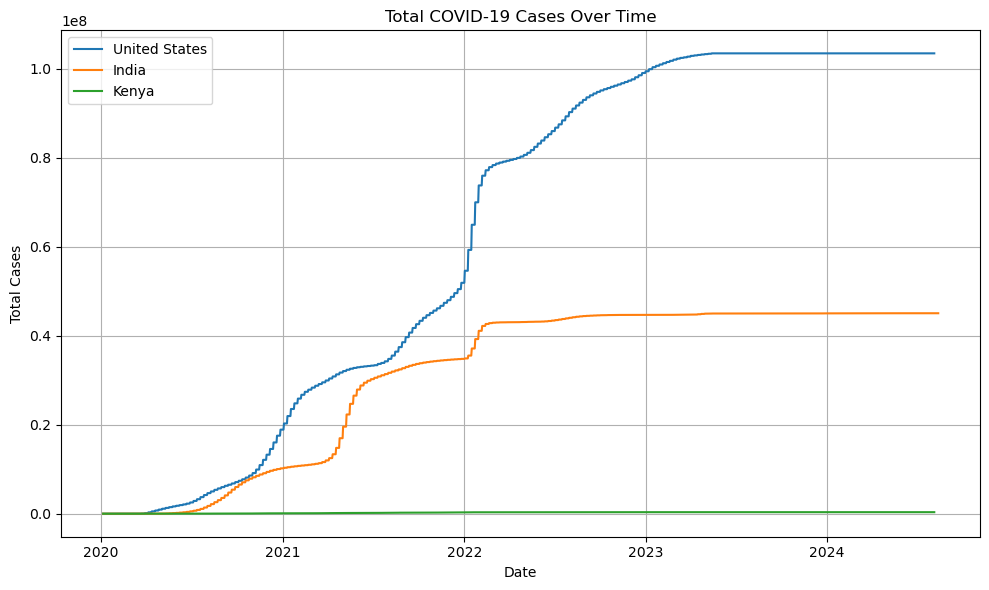

In [11]:
# 📈 Total cases over time
plt.figure(figsize=(10, 6))
for country in countries:
    subset = df_countries[df_countries['location'] == country]
    plt.plot(subset['date'], subset['total_cases'], label=country)
plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


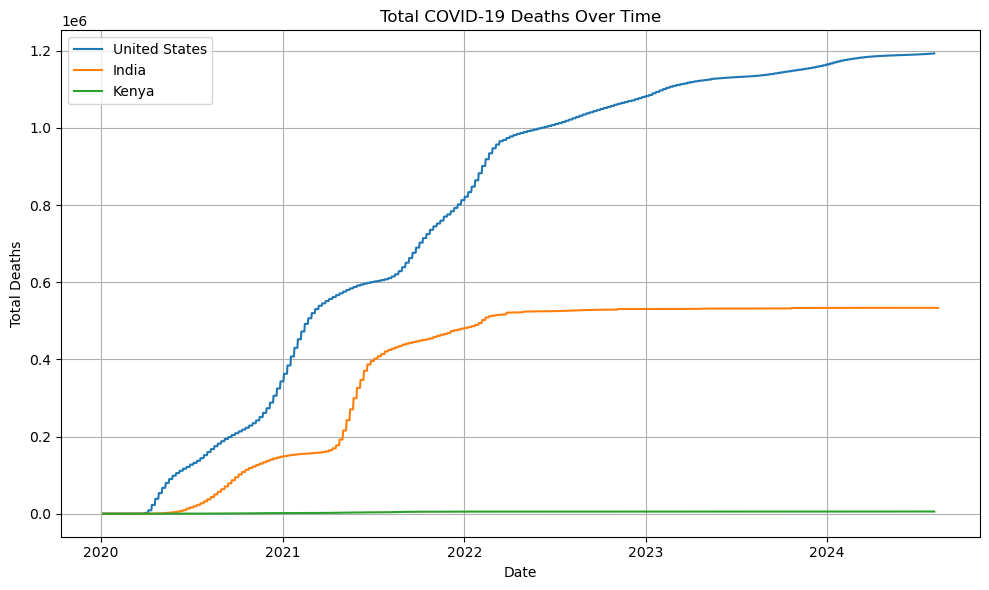

In [12]:
# 📊 Total deaths over time
plt.figure(figsize=(10, 6))
for country in countries:
    subset = df_countries[df_countries['location'] == country]
    plt.plot(subset['date'], subset['total_deaths'], label=country)
plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
# ⚰️ Death rate = total_deaths / total_cases
df_countries['death_rate'] = df_countries['total_deaths'] / df_countries['total_cases']


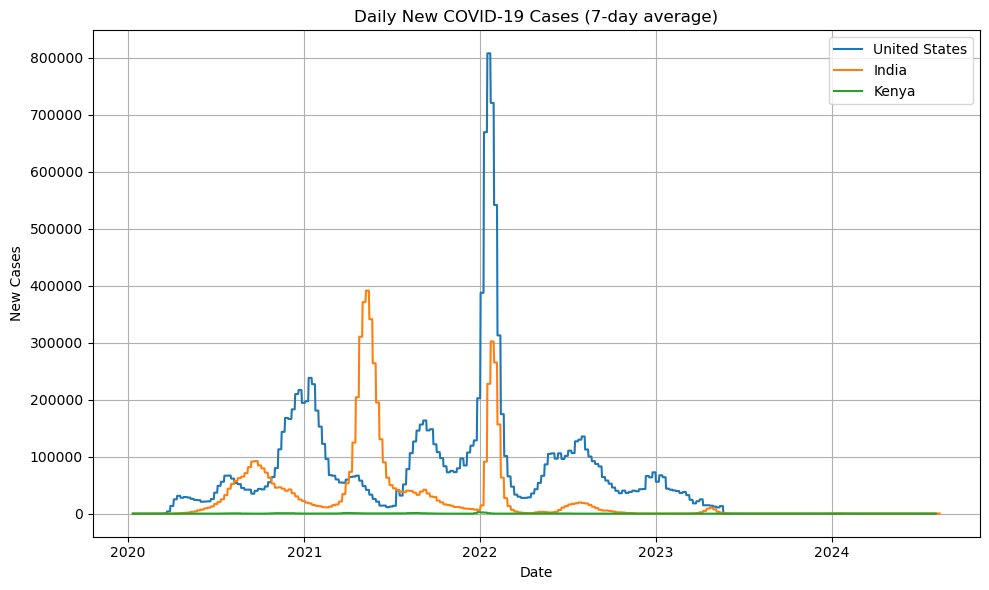

In [14]:
# 📉 Plot daily new cases
plt.figure(figsize=(10, 6))
for country in countries:
    subset = df_countries[df_countries['location'] == country]
    plt.plot(subset['date'], subset['new_cases'].rolling(7).mean(), label=country)  # 7-day average
plt.title("Daily New COVID-19 Cases (7-day average)")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


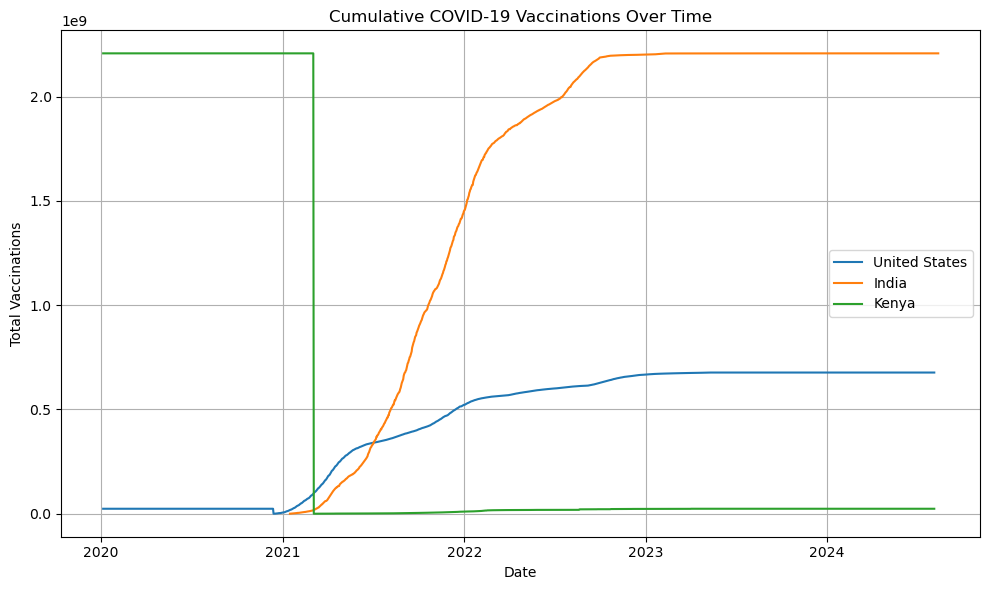

In [15]:
# 💉 Cumulative vaccinations
plt.figure(figsize=(10, 6))
for country in countries:
    subset = df_countries[df_countries['location'] == country]
    plt.plot(subset['date'], subset['total_vaccinations'], label=country)
plt.title("Cumulative COVID-19 Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
# # 🌍 Choropleth of total cases (latest date)
# latest = df[df['date'] == df['date'].max()]
# fig = px.choropleth(latest, locations="iso_code",
#                     color="total_cases",
#                     hover_name="location",
#                     color_continuous_scale="Reds",
#                     title="Total COVID-19 Cases by Country")
# fig.show()


In [ ]:
---

## 7️⃣ Insights & Summary

- 🇮🇳 **India** had a sharp spike in daily cases during mid-2021.
- 🇺🇸 **USA** achieved the highest vaccination count but still saw surges.
- 🇰🇪 **Kenya** had slower vaccination rollout but lower absolute death count.
- 💉 Vaccination rollouts varied greatly by region and income levels.

> Add more insights here based on your visualizations and data.

---

## 📤 Export (Optional)
You can export this notebook as a PDF via `File > Export Notebook As... > PDF`.

